In [1]:
import numpy as np
import pandas as pd

Dataset Link = https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GMFCTR

In [21]:
df = pd.read_csv("E:/Datasets/Topic Minning/Harverd/NewsArticles.csv", encoding= 'unicode_escape')
df.head()

,article_id,publish_date,article_source_link,title,subtitle,text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143
0,1,2017/2/7,http://abcnews.go.com/Politics/pence-break-tie...,"Betsy DeVos Confirmed as Education Secretary, ...",NaN,Michigan billionaire education activist Betsy ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017/2/7,http://abcnews.go.com/Politics/wireStory/melan...,Melania Trump Says White House Could Mean Mill...,NaN,First lady Melania Trump has said little about...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017/2/7,http://abcnews.go.com/Politics/wireStory/trump...,"As Trump Fears Fraud, GOP Eliminates Election ...",NaN,A House committee voted on Tuesday to eliminat...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2017/2/7,http://abcnews.go.com/Politics/appeals-court-d...,Appeals Court to Decide on Challenge to Trump'...,NaN,"This afternoon, three federal judges from the ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2017/2/7,http://abcnews.go.com/US/23-states-winter-weat...,At Least 4 Tornadoes Reported in Southeast Lou...,NaN,At least four tornadoes touched down in Louisi...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
article = df.text.values

In [45]:
len(article)

3824

In [46]:
main_data = article

In [47]:
link = df["article_source_link"].values

In [48]:
import collections

In [49]:
#occurrences = collections.Counter(group)
#print(occurrences)

In [50]:
#heading = df.Heading.values

# Community Detection

In [51]:
art = []
for i in article:
    if(len(str(i))>0):
        art.append(str(i))
article = art
len(article)

3824

In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

import re
from gensim.parsing.preprocessing import remove_stopwords

from nltk.corpus import wordnet

In [53]:
pos = ["FW", "NN", "NNS", "NNP", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]

In [54]:
wn = nltk.WordNetLemmatizer()

In [55]:
def unique(s):
    unique_list = []
    for x in s:
        if x not in unique_list:
            check = x.isnumeric()
            if(check):
                unique_list.append("num")
            else:
                unique_list.append(x)
            
    return unique_list

In [39]:
def preprocess(art):
    articles = []
    for l in art:
        l = str(l)
        if(len(l)>300):
            article = l.split('.')
            txt = article[0]
            txt2 = article[1:]
            bucket = []
            for i in txt2:
                tokenized = sent_tokenize(i)
                t = []
                for i in tokenized:
     
                    wordsList = nltk.word_tokenize(i)
                    wordsList = [w for w in wordsList if not w in stop_words]
                    tagged = nltk.pos_tag(wordsList)
                    for i in tagged:
                        t.append(i)
                s = ""
                for i in t:
                    if(i[1] in pos):
                        s=s+" "+i[0]
                    
                article = s
                article = article.lower()
                article = re.sub(r'[^\w\s]','',article)
                article = remove_stopwords(article)
                words_article = word_tokenize(article)
                wa = []
                for i in words_article:
                    bucket.append(wn.lemmatize(i))
            
            bucket= unique(bucket)
            
            
            tokenized = sent_tokenize(txt)
            t = []
            for i in tokenized:
     
                wordsList = nltk.word_tokenize(i)
                wordsList = [w for w in wordsList if not w in stop_words]
                tagged = nltk.pos_tag(wordsList)
                for i in tagged:
                    t.append(i)
            s = ""
            for i in t:
                if(i[1] in pos):
                    s=s+" "+i[0]
                    
            article = s
            article = article.lower()
            article = re.sub(r'[^\w\s]','',article)
            article = remove_stopwords(article)
            words_article = word_tokenize(article)
            wa = []
            for i in words_article:
                a = wn.lemmatize(i)
                if a in bucket:
                    wa.append(a)
            
            s = unique(wa)
            articles.append(s)
        else:
            articles.append([""])
    return articles

In [40]:
topic_sen = preprocess(article)

In [41]:
counts = {}
for i in topic_sen:
    for j in i:
        if j in counts:
            counts[j] +=1
        else:
            counts[j] = 1

In [42]:
new_data = []
for i in topic_sen:
    art=[]
    for j in i:
        if(counts[j]>1):
            art.append(j)
    new_data.append(art)

In [43]:
c = 0
for i in new_data:
    c = c + len(i)
    
c

18758

In [56]:
replace = {}
w = []
for i in new_data:
    for word in i:
        synonyms = []
        for syn in wordnet.synsets(word):
            for i in syn.lemmas():
                synonyms.append(i.name())
        if(len(set(synonyms))==0):
            replace[word] = word
            w.append(word)
        else:
            for i in synonyms:
                if i not in w:
                    replace[i] = word
                    w.append(word)

In [57]:
final_topic_sen = []
for i in new_data:
    a = []
    for j in i:
        if(j in replace):
            a.append(replace[j])
        else:
            a.append(j)
    final_topic_sen.append(a)

In [58]:
c = 0
for i in final_topic_sen:
    c = c + len(i)
    
c

18758

In [59]:
import math
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=2)

In [61]:
documents = []
for i in final_topic_sen:
    s = ""
    for j in i:
        s = s+" "+j
    documents.append(s)

In [62]:
len(documents)

3824

In [63]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [64]:
len(tfidf_vectorizer.get_feature_names())

2087

In [65]:
valid = tfidf_vectorizer.get_feature_names()

In [66]:
final = []
for i in final_topic_sen:
    s = []
    for j in i:
        if j in valid:
            s.append(j)
    if(len(s)>0):
        final.append(s)

In [67]:
len(final)

3344

In [68]:
dt = []
for i in final:
    s = ""
    for j in i:
        s = s+j+" "
    dt.append(s)

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')

X = cv.fit_transform(dt)
Xc = (X.T * X)
Xc.setdiag(0)

In [70]:
names = cv.get_feature_names()
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

In [71]:
matrix = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
matrix

C:\Users\USER\AppData\Local\Temp/ipykernel_15908/1718618950.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = df.where(np.triu(np.ones(df.shape)).astype(np.bool))


,a400m,ababa,abc,abdul,abortion,abu,academic,accepted,accident,accommodation,...,zealand,zealandia,zhang,zhao,zhejiang,zhou,zimbabwe,zone,zoo,zuma
a400m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
ababa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
abc,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
abdul,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
abortion,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0
zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0
zone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0
zoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [72]:
matrix = matrix.stack().reset_index()
matrix.columns = ['Row','Column','Value']
matrix

,Row,Column,Value
0,a400m,a400m,0.0
1,a400m,ababa,0.0
2,a400m,abc,0.0
3,a400m,abdul,0.0
4,a400m,abortion,0.0
...,...,...,...
2162155,zone,zoo,0.0
2162156,zone,zuma,0.0
2162157,zoo,zoo,0.0
2162158,zoo,zuma,0.0


In [73]:
edge = matrix[matrix["Value"] != 0]
edge

,Row,Column,Value
51,a400m,airbus,2.0
398,a400m,company,1.0
481,a400m,customer,1.0
510,a400m,defense,1.0
781,a400m,germany,1.0
...,...,...,...
2161990,yahoo,year,1.0
2162011,year,york,3.0
2162018,year,zhejiang,1.0
2162070,york,yorkers,2.0


In [74]:
node1 = edge.Row.values
node2 = edge.Column.values
value = edge.Value.values

In [75]:
value = 1/value

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms import community
import community as community_louvain
import networkx.algorithms.community as nx_comm

In [77]:
G = nx.Graph()

In [78]:
for i in range(0, len(node1)):
    G.add_edge(node1[i], node2[i])

In [79]:
partition = community_louvain.best_partition(G)

In [81]:
m = max(list(partition.values()))
total_com = m+1
total_com

9

In [82]:
community_word = []
for i in range(0, total_com):
    a=[]
    for j in partition:
        if partition[j] == i:
            a.append(j)
            
            
    print(i,"------->")
    print("Total Words: ", len(a))
    print("Words: ", a)
    print()
    print()
    print()
    community_word.append(a)

0 ------->
Total Words:  322
Words:  ['a400m', 'airbus', 'defense', 'germany', 'lithuania', 'program', 'authority', 'court', 'girl', 'held', 'police', 'shooting', 'shot', 'son', 'network', 'woman', 'bailey', 'jury', 'man', 'men', 'month', 'age', 'agent', 'arrested', 'assault', 'body', 'california', 'charge', 'charged', 'chief', 'childhood', 'content', 'corruption', 'crime', 'damage', 'developed', 'diplomat', 'doping', 'drink', 'drug', 'el', 'executed', 'exposed', 'exposure', 'fired', 'gasoline', 'hate', 'jong', 'kid', 'kim', 'korea', 'lead', 'leader', 'mediterranean', 'medium', 'migration', 'missile', 'monday', 'murder', 'nerve', 'north', 'oklahoma', 'peer', 'penalty', 'playback', 'point', 'racism', 'released', 'report', 'share', 'status', 'sudan', 'supported', 'suspect', 'suspected', 'tennessee', 'tobacco', 'university', 'use', 'vx', 'accused', 'airport', 'assassination', 'baton', 'deputy', 'duterte', 'gambia', 'jaeyong', 'kuala', 'lee', 'lumpur', 'malaysia', 'pipe', 'rape', 'rodrigo'

In [83]:
for i in range(0, len(community_word)):
    importent = {}
    j_count = []
    com = community_word[i]
    G6 = nx.Graph()
    for e in range(0, len(node1)):
        if(node1[e] in com  and node2[e] in com):
            G6.add_edge(node1[e], node2[e], weight=value[e])
            
    centrality = nx.eigenvector_centrality(G6)      
    a = sorted(centrality.items())
    eg = {}
    for j in a:
        eg[j[0]] = j[1]
    sorted_dict = {k: v for k, v in sorted(eg.items(), key=lambda item: item[1],reverse=True)}
    print(i,"------------>")
    print(sorted_dict)
    print()
    print()

0 ------------>
{'police': 0.22182784880570094, 'court': 0.2156802953198104, 'korea': 0.19587095111235223, 'report': 0.188126229727377, 'murder': 0.1804237239665236, 'leader': 0.1738758915482165, 'month': 0.16858082811772918, 'north': 0.16808581983427504, 'man': 0.1675488520586892, 'monday': 0.16744611393298134, 'kim': 0.15384539427989283, 'charged': 0.14718337912478974, 'woman': 0.1431329460678224, 'airport': 0.14013117819572357, 'agent': 0.1343064776257892, 'charge': 0.12825413193986132, 'body': 0.1275313624964383, 'medium': 0.12578386559477173, 'malaysia': 0.1232838944623526, 'nerve': 0.12162895691072295, 'drug': 0.11982607721734438, 'crime': 0.11591275410976662, 'authority': 0.11178725097114975, 'released': 0.11122962696515575, 'suspect': 0.10794204669843915, 'accused': 0.10701105270276796, 'jong': 0.10624849923266676, 'run': 0.09927737217759344, 'jongnam': 0.09919929882001102, 'use': 0.09582401879749751, 'son': 0.09491620111247963, 'prosecutor': 0.09481740628165017, 'arrested': 0.

2 ------------>
{'east': 0.23080714648904502, 'coast': 0.2255010185774478, 'helicopter': 0.2145842258294173, 'member': 0.21035282497727048, 'guard': 0.20161430695273178, 'condition': 0.19179548002069982, 'home': 0.17798989458288422, 'flight': 0.17133941087322108, 'missing': 0.1700435041929412, 'israel': 0.16162213223309937, 'morning': 0.15210006218961364, 'search': 0.15138090785969033, 'day': 0.15127824102694382, 'crew': 0.1501772980579955, 'air': 0.14994845854035285, 'thousand': 0.13360334432509743, 'rescue': 0.13306649188220565, 'sea': 0.1281502944658658, 'right': 0.1262233662226491, 'aircraft': 0.12326451821913385, 'occupied': 0.12089972299994631, 'recorder': 0.11978584713927297, 'middle': 0.11607672189442474, 'box': 0.11529600406751396, 'solution': 0.11106614631738253, 'village': 0.10969284733007928, 'land': 0.10769958933491852, 'west': 0.10437830263537866, 'island': 0.10402663665322612, 'crashed': 0.10335361567869035, 'researcher': 0.10256522963805183, 'mayo': 0.10183733815220078,

4 ------------>
{'trump': 0.25699017033910465, 'president': 0.2466940042716999, 'house': 0.20959618036377545, 'press': 0.17614532292334645, 'donald': 0.17153342304249064, 'white': 0.1710226011265087, 'official': 0.16071464048745238, 'election': 0.14377311021175385, 'committee': 0.14270486934248483, 'administration': 0.1376870318255126, 'intelligence': 0.137412842945128, 'news': 0.13597332227968015, 'russia': 0.12574015863160337, 'department': 0.11834238052308137, 'session': 0.11643985412920836, 'attorney': 0.11167659231287654, 'security': 0.11097870317906869, 'justice': 0.11071587873225423, 'investigation': 0.1090373099635722, 'meeting': 0.10512481285862665, 'hearing': 0.10133617471839831, 'senate': 0.10059905986894564, 'general': 0.10042540147308762, 'today': 0.09793175343907144, 'agency': 0.09659404386374565, 'adviser': 0.09373522212998991, 'told': 0.09017220344503672, 'ambassador': 0.08896670617481246, 'asked': 0.08881654247097986, 'jeff': 0.08823073898931261, 'information': 0.08790

6 ------------>
{'said': 0.2646152225482892, 'government': 0.2175800586014196, 'force': 0.2133211473960034, 'group': 0.2077848156833419, 'people': 0.19336754395699918, 'city': 0.1919822830908819, 'isil': 0.17447882028143247, 'champion': 0.168005841076325, 'killed': 0.16648710464870958, 'syria': 0.14604048997649097, 'thursday': 0.1458861066210576, 'week': 0.1446303745533462, 'according': 0.1446162130541489, 'war': 0.14040043532737895, 'attack': 0.13173175643052237, 'iraq': 0.12934282776145384, 'killing': 0.12363680231811351, 'iraqi': 0.12157419460763425, 'area': 0.1209167257042386, 'afghan': 0.11992215692471493, 'civilian': 0.1183764099589123, 'mosul': 0.11610834150572773, 'wednesday': 0.11420111325581113, 'rise': 0.11052857761392644, 'capital': 0.10421263280243434, 'turkey': 0.09002268907701066, 'province': 0.08970070310674384, 'pakistan': 0.08832827677202014, 'operation': 0.08618930466697168, 'death': 0.08576806541686237, 'control': 0.08329093228977344, 'raid': 0.08078621235961339, 'o

In [115]:
aa = []
for i in range(0, len(community_word)):
    importent = {}
    j_count = []
    com = community_word[i]
    G6 = nx.Graph()
    for e in range(0, len(node1)):
        if(node1[e] in com  and node2[e] in com):
            G6.add_edge(node1[e], node2[e], weight=value[e])
            
    centrality = nx.eigenvector_centrality(G6)      
    a = sorted(centrality.items())
    eg = {}
    for j in a:
        eg[j[0]] = j[1]
    print(i,"------------>")
    b = sorted(eg, key=eg.get, reverse=True)[:10]
    print(b)
    aa.append(b)
    print()

0 ------------>
['police', 'court', 'korea', 'report', 'murder', 'leader', 'month', 'north', 'man', 'monday']

1 ------------>
['china', 'state', 'year', 'company', 'say', 'world', 'market', 'business', 'growth', 'trade']

2 ------------>
['east', 'coast', 'helicopter', 'member', 'guard', 'condition', 'home', 'flight', 'missing', 'israel']

3 ------------>
['minister', 'party', 'union', 'brexit', 'european', 'care', 'prime', 'health', 'eu', 'britain']

4 ------------>
['trump', 'president', 'house', 'press', 'donald', 'white', 'official', 'election', 'committee', 'administration']

5 ------------>
['child', 'time', 'france', 'programme', 'whistleblower', 'maurice', 'claim', 'fianna', 'fil', 'file']

6 ------------>
['said', 'government', 'force', 'group', 'people', 'city', 'isil', 'champion', 'killed', 'syria']

7 ------------>
['order', 'judge', 'travel', 'ban', 'executive', 'action', 'revised', 'ruling', 'hawaii', 'muslim']

8 ------------>
['new', 'march', 'york', 'community', 'john

In [117]:
df = pd.DataFrame(aa, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df

,0,1,2,3,4,5,6,7,8,9
0,police,court,korea,report,murder,leader,month,north,man,monday
1,china,state,year,company,say,world,market,business,growth,trade
2,east,coast,helicopter,member,guard,condition,home,flight,missing,israel
3,minister,party,union,brexit,european,care,prime,health,eu,britain
4,trump,president,house,press,donald,white,official,election,committee,administration
5,child,time,france,programme,whistleblower,maurice,claim,fianna,fil,file
6,said,government,force,group,people,city,isil,champion,killed,syria
7,order,judge,travel,ban,executive,action,revised,ruling,hawaii,muslim
8,new,march,york,community,john,india,pradesh,uttar,scientist,running


# LDA with Community Count

In [84]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import math
from sklearn.feature_extraction.text import TfidfVectorizer


import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
data = main_data

In [86]:
wn = nltk.WordNetLemmatizer()

In [87]:
part1 = data

In [88]:
data = []
for i in part1:
    article = re.sub(r'[^\w\s]','',str(i))
    article = article.lower()
    article = remove_stopwords(article)
    words_article = word_tokenize(article)
    s = []
    for w in words_article:
        e = wn.lemmatize(w)
        if e not in stop_words:
            s.append(e)
    data.append(s)

In [89]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=2)

In [90]:
documents = []
for i in data:
    s = ""
    for j in i:
        s = s+" "+j
    documents.append(s)

In [91]:
len(documents)

3824

In [92]:
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [93]:
len(tfidf_vectorizer.get_feature_names())

26964

In [94]:
valid = tfidf_vectorizer.get_feature_names()

In [95]:
final = []
for i in data:
    s = []
    for j in i:
        if j in valid:
            s.append(j)
    final.append(s)

In [96]:
id2word = corpora.Dictionary(final)

In [130]:
import pickle

some_obj = {'article':final}

with open('experiment_3.pickle', 'wb') as f:
    pickle.dump(some_obj, f)

In [98]:
texts = final
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 5), (56, 1), (57, 1), (58, 1), (59, 1), (60, 6), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 3), (106, 1), (107, 1), (108, 1), (109, 4), (110, 1)

In [99]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=total_com)

In [100]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"people" + 0.007*"china" + 0.006*"said" + 0.005*"say" + 0.004*"woman" '
  '+ 0.004*"country" + 0.004*"year" + 0.004*"new" + 0.003*"trump" + '
  '0.003*"state"'),
 (1,
  '0.018*"said" + 0.006*"people" + 0.005*"year" + 0.005*"police" + '
  '0.004*"government" + 0.004*"state" + 0.004*"new" + 0.003*"trump" + '
  '0.003*"country" + 0.003*"news"'),
 (2,
  '0.017*"said" + 0.005*"trump" + 0.005*"year" + 0.005*"people" + 0.005*"time" '
  '+ 0.004*"new" + 0.004*"state" + 0.004*"president" + 0.003*"country" + '
  '0.003*"day"'),
 (3,
  '0.012*"said" + 0.005*"country" + 0.005*"year" + 0.004*"say" + 0.004*"china" '
  '+ 0.003*"new" + 0.003*"trump" + 0.003*"state" + 0.003*"company" + '
  '0.003*"russian"'),
 (4,
  '0.023*"trump" + 0.013*"said" + 0.010*"house" + 0.009*"president" + '
  '0.005*"white" + 0.005*"republican" + 0.005*"year" + 0.004*"time" + '
  '0.004*"people" + 0.004*"committee"'),
 (5,
  '0.021*"said" + 0.005*"minister" + 0.005*"year" + 0.005*"party" + '
  '0.005*"governme

In [101]:
x = lda_model.print_topics()
a = []
for i in x:
    b = i[1].split('"')
    c = []
    for j in range(0, len(b)):
        if(j%2!=0):
            c.append(b[j])
    a.append(c)
    
    
df = pd.DataFrame(a, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df

,0,1,2,3,4,5,6,7,8,9
0,people,china,said,say,woman,country,year,new,trump,state
1,said,people,year,police,government,state,new,trump,country,news
2,said,trump,year,people,time,new,state,president,country,day
3,said,country,year,say,china,new,trump,state,company,russian
4,trump,said,house,president,white,republican,year,time,people,committee
5,said,minister,year,party,government,country,russia,china,state,people
6,said,people,president,new,year,court,trump,country,told,state
7,year,people,said,china,state,country,new,government,law,say
8,said,year,country,people,korea,trump,state,government,attack,new


# LDA with Coherence

In [102]:
def take_coherence(topic):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=topic)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=final, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [118]:
x = []
y = []
for i in range(1, 40):
    x.append(i+1)
    y.append(take_coherence(i))

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

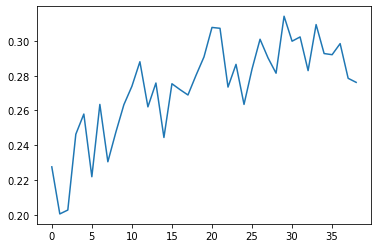

In [120]:
sns.lineplot(
    data=y,  err_style="bars"
)

In [121]:
m = y.index(max(y))
print(m+1)
b = m+1

30


In [122]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=b)

In [123]:
pprint(lda_model.print_topics(num_topics=b, num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.008*"said" + 0.006*"world" + 0.006*"country" + 0.005*"people" + '
  '0.005*"year" + 0.005*"ireland" + 0.004*"state" + 0.004*"city" + 0.003*"new" '
  '+ 0.003*"group"'),
 (1,
  '0.012*"said" + 0.007*"president" + 0.007*"people" + 0.007*"country" + '
  '0.006*"government" + 0.006*"trump" + 0.005*"state" + 0.004*"agency" + '
  '0.004*"year" + 0.004*"force"'),
 (2,
  '0.011*"said" + 0.009*"child" + 0.006*"year" + 0.005*"country" + '
  '0.005*"people" + 0.004*"woman" + 0.003*"government" + 0.003*"time" + '
  '0.003*"life" + 0.003*"family"'),
 (3,
  '0.011*"said" + 0.010*"people" + 0.006*"year" + 0.006*"care" + 0.006*"state" '
  '+ 0.005*"government" + 0.005*"health" + 0.004*"say" + 0.004*"country" + '
  '0.003*"million"'),
 (4,
  '0.013*"said" + 0.007*"people" + 0.006*"government" + 0.006*"trump" + '
  '0.005*"house" + 0.005*"state" + 0.005*"president" + 0.004*"country" + '
  '0.004*"year" + 0.004*"official"'),
 (5,
  '0.008*"said" + 0.008*"people" + 0.007*"china" + 0.006*"year" +

In [124]:
x = lda_model.print_topics(num_topics=b, num_words=10)
x

[(0,
  '0.008*"said" + 0.006*"world" + 0.006*"country" + 0.005*"people" + 0.005*"year" + 0.005*"ireland" + 0.004*"state" + 0.004*"city" + 0.003*"new" + 0.003*"group"'),
 (1,
  '0.012*"said" + 0.007*"president" + 0.007*"people" + 0.007*"country" + 0.006*"government" + 0.006*"trump" + 0.005*"state" + 0.004*"agency" + 0.004*"year" + 0.004*"force"'),
 (2,
  '0.011*"said" + 0.009*"child" + 0.006*"year" + 0.005*"country" + 0.005*"people" + 0.004*"woman" + 0.003*"government" + 0.003*"time" + 0.003*"life" + 0.003*"family"'),
 (3,
  '0.011*"said" + 0.010*"people" + 0.006*"year" + 0.006*"care" + 0.006*"state" + 0.005*"government" + 0.005*"health" + 0.004*"say" + 0.004*"country" + 0.003*"million"'),
 (4,
  '0.013*"said" + 0.007*"people" + 0.006*"government" + 0.006*"trump" + 0.005*"house" + 0.005*"state" + 0.005*"president" + 0.004*"country" + 0.004*"year" + 0.004*"official"'),
 (5,
  '0.008*"said" + 0.008*"people" + 0.007*"china" + 0.006*"year" + 0.005*"say" + 0.004*"new" + 0.004*"trump" + 0.003

In [125]:
len(x)

30

In [126]:
a = []
for i in x:
    b = i[1].split('"')
    c = []
    for j in range(0, len(b)):
        if(j%2!=0):
            c.append(b[j])
    a.append(c)

In [127]:
a

[['said',
  'world',
  'country',
  'people',
  'year',
  'ireland',
  'state',
  'city',
  'new',
  'group'],
 ['said',
  'president',
  'people',
  'country',
  'government',
  'trump',
  'state',
  'agency',
  'year',
  'force'],
 ['said',
  'child',
  'year',
  'country',
  'people',
  'woman',
  'government',
  'time',
  'life',
  'family'],
 ['said',
  'people',
  'year',
  'care',
  'state',
  'government',
  'health',
  'say',
  'country',
  'million'],
 ['said',
  'people',
  'government',
  'trump',
  'house',
  'state',
  'president',
  'country',
  'year',
  'official'],
 ['said',
  'people',
  'china',
  'year',
  'say',
  'new',
  'trump',
  'country',
  'time',
  'like'],
 ['said',
  'people',
  'say',
  'president',
  'woman',
  'state',
  'year',
  'trump',
  'china',
  'day'],
 ['china',
  'said',
  'year',
  'say',
  'chinese',
  'company',
  'people',
  'country',
  'percent',
  'billion'],
 ['trump',
  'said',
  'president',
  'house',
  'white',
  'republican',
  

In [128]:
df = pd.DataFrame(a, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [129]:
df

,0,1,2,3,4,5,6,7,8,9
0,said,world,country,people,year,ireland,state,city,new,group
1,said,president,people,country,government,trump,state,agency,year,force
2,said,child,year,country,people,woman,government,time,life,family
3,said,people,year,care,state,government,health,say,country,million
4,said,people,government,trump,house,state,president,country,year,official
5,said,people,china,year,say,new,trump,country,time,like
6,said,people,say,president,woman,state,year,trump,china,day
7,china,said,year,say,chinese,company,people,country,percent,billion
8,trump,said,president,house,white,republican,state,new,time,people
9,said,uk,eu,brexit,people,year,referendum,scotland,government,minister
